<B>Import Libraries</B>
<br>
<br> 
<br>* random     => for generating random code
<br>
<br>* numpy      => for efficient array manipulation and some statistical operations, such as computing averages and standard deviations.
<br>
<br>* timeit     => It's used to measure the execution time of the Quick Sort algorithm for each array during the empirical analysis.
<br>
<br>* matplotlib => It is used to plot the results of the empirical analysis, showing the relationship between array size and execution time.
<br>
<br>* ipywidgets => it is used to create an interactive widget that can show multiple graphs for making comparisons if different inputs are being tested
<br>
<br>* IPython.display => it is used to display the graphs that are being created after the inputs are entered by the user into the interactive widget

In [101]:
import random
import numpy as np
import timeit
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

<b>Quick Sort Algorithm</b>
<br>
<br> Quicksort is a recursive sorting algorithm that employs a divide-and-conquer strategy, prioritizing the divide 
<br>step over the combine step, distinguishing it from merge sort. In contrast to merge sort, quicksort operates 
<br>in-place and exhibits a worst-case time complexity of <b> Big O of n squared</b> akin to selection sort and insertion sort. 
<br>Nevertheless, its average-case time complexity matches that of merge sort at <b> n log base2 of n</b>. 

In [102]:
def quicksort(arr):
    # Initialize a list to store subarrays as tuples (start, end)
    intervals = [(0, len(arr))]
    
    while intervals:
        start, end = intervals.pop()
        
        # Base case: if the list has 1 element or is empty, it's already sorted
        if end - start <= 1:
            continue
        
        pivot = arr[start]
        left = start + 1
        right = end - 1
        
        while left <= right:
            # Find the first element greater than the pivot from the left
            while left <= right and arr[left] <= pivot:
                left += 1
            
            # Find the first element less than the pivot from the right
            while left <= right and arr[right] > pivot:
                right -= 1
            
            # Swap elements at left and right indices
            if left <= right:
                arr[left], arr[right] = arr[right], arr[left]
                left += 1
                right -= 1
        
        # Move the pivot to its final position
        arr[start], arr[right] = arr[right], arr[start]
        
        # Append the subarrays into the list
        intervals += [(start, right), (left, end)]

    return arr

<b>Generate Random Arrays</b>
<br>
<br>This function generates random arrays similar to generate_arrays function in createData.py


In [103]:
def generate_arrays(arr_size, num_arrays, integer_range):
    arrays = []
    for i in range(num_arrays):
        arr = []
        for j in range(arr_size):
            arr.append(random.randint(0, integer_range))
        arrays.append(arr)
    return arrays

<b>Empirical Analysis and how it is working here</b>
<br>
<br>Empirical analysis involves the use of real-world data to evaluate the performance or behavior of a system, process, or algorithm. 
<br>In the context of the quicksort algorithm, empirical analysis would entail conducting experiments and collecting data on the 
<br>algorithm's performance, such as its execution time and memory usage, using various input data sets.
<br>
<br>The code performs empirical analysis on the Quicksort algorithm by measuring its execution time for various array sizes and input datasets. 
<br>It utilizes a helper function generate_arrays for creating random arrays and employs the timeit module to ensure accurate timing measurements. 
<br>The results are stored in the execution_times list, offering quantitative insights into the algorithm's performance across different input scenarios.


In [104]:

def empirical_analysis(array_sizes, num_arrays, integer_range):
    execution_times = []
    for size in array_sizes:
        # Generate random arrays for the given size
        test_data = generate_arrays(size, num_arrays, integer_range)
        start_time = timeit.default_timer()
        # Apply quicksort to each array and measure execution time
        for arr in test_data:
            quicksort(arr)
        execution_times.append(timeit.default_timer() - start_time)
    return execution_times

<b>Performing Analysis using fixed values</b>
<br>
<br>
<br>Following parameters are set for the variables:
<br>
<br>Size of arrays = 100,200,300,400,500,1500
<br>
<br>The number of arrays = 5
<br>
<br>Integer range = 50


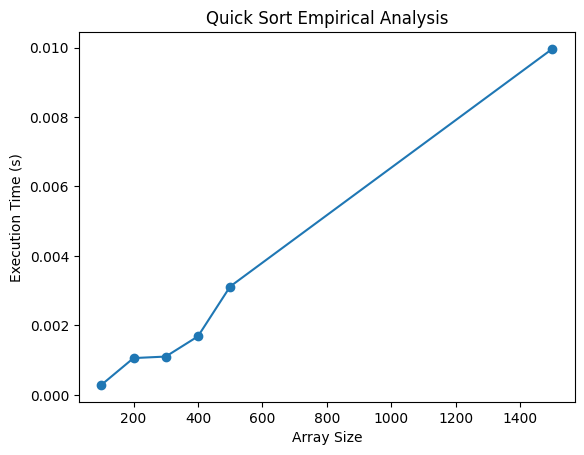

In [109]:
# Preset values
preset_array_sizes = [100, 200, 300, 400, 500, 1500]
preset_num_arrays = 5
preset_integer_range = 50

# Perform the empirical analysis
execution_times = empirical_analysis(preset_array_sizes, preset_num_arrays, preset_integer_range)

# Visualize Results
plt.plot(preset_array_sizes, execution_times, marker='o')
plt.title("Quick Sort Empirical Analysis")
plt.xlabel("Array Size")
plt.ylabel("Execution Time (s)")
plt.show()


In [110]:
# Display Statistics for the above graph
avg_time = np.mean(execution_times)
median_time = np.median(execution_times)
std_dev_time = np.std(execution_times)
max_time = np.max(execution_times)
min_time = np.min(execution_times)


print(f"Average Time: {avg_time:.6f} s")
print(f"Median Time: {median_time:.6f} s")
print(f"Standard Deviation: {std_dev_time:.6f} s")
print(f"Max Time: {max_time:.6f} s")
print(f"Min Time: {min_time:.6f} s")

Average Time: 0.002869 s
Median Time: 0.001395 s
Standard Deviation: 0.003286 s
Max Time: 0.009959 s
Min Time: 0.000288 s


<b>Performing Analysis using user provided values</b>
<br>
<br>
<br>Following parameters are to be set by the user in widget input area below:
<br>
<br>Size of arrays = Example values = 100, 200, 300, 400, 750
<br>
<br>The number of arrays (to be selected from the slider)
<br>
<br>Integer range (to be selected from the slider)


Text(value='', description='Array Sizes (comma-separated):')

IntSlider(value=1, description='Number of Arrays:', max=10, min=1)

IntSlider(value=10, description='Integer Range:', min=1)

Button(description='Run Analysis', style=ButtonStyle())

Output()

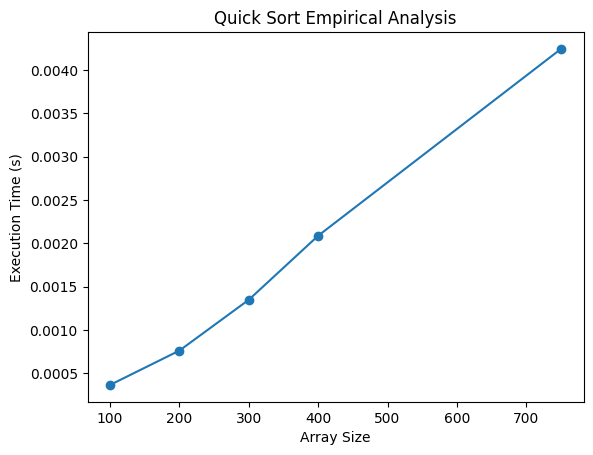

In [107]:
# Create input widgets
array_sizes_input = widgets.Text(description="Array Sizes (comma-separated):")
num_arrays_input = widgets.IntSlider(description="Number of Arrays:", min=1, max=10, step=1, value=1)
integer_range_input = widgets.IntSlider(description="Integer Range:", min=1, max=100, step=1, value=10)
button = widgets.Button(description="Run Analysis")
output_text = widgets.Output()

# processing the input of data after button click
def on_button_click(b):
    # Get values from widgets
    array_sizes = [int(size) for size in array_sizes_input.value.split(",")]
    num_arrays = num_arrays_input.value
    integer_range = integer_range_input.value

    # Perform the empirical analysis
    execution_times = empirical_analysis(array_sizes, num_arrays, integer_range)

    # Visualize Results
    plt.plot(array_sizes, execution_times, marker='o')
    plt.title("Quick Sort Empirical Analysis")
    plt.xlabel("Array Size")
    plt.ylabel("Execution Time (s)")
    plt.show()

    # Display Statistics
    avg_time = np.mean(execution_times)
    median_time = np.median(execution_times)
    std_dev_time = np.std(execution_times)
    max_time = np.max(execution_times)
    min_time = np.min(execution_times)

    with output_text:
        output_text.clear_output(wait=True)
        print(f"Average Time: {avg_time:.6f} s")
        print(f"Median Time: {median_time:.6f} s")
        print(f"Standard Deviation: {std_dev_time:.6f} s")
        print(f"Max Time: {max_time:.6f} s")
        print(f"Min Time: {min_time:.6f} s")

# Attach the function to the button's click event
button.on_click(on_button_click)

# Display the widgets
display(array_sizes_input)
display(num_arrays_input)
display(integer_range_input)
display(button)
display(output_text)


<b>References</b>
<br>
<br>ipywidgets. (2022, September 27). IPython Widgets. Retrieved from https://ipywidgets.readthedocs.io/en/7.x/
<br>
<br>Khan Academy. (n.d.). Overview of Quicksort. Retrieved from https://www.khanacademy.org/computing/computer-science/algorithms/quick-sort/a/overview-of-quicksort
<br>
<br>Sarwar, S. M., Jaragh, M., & Wind, M. (1994, May 1). An empirical study of the run-time behavior of quicksort, Shellsort and mergesort for medium to large size data. Computer Languages. https://doi.org/10.1016/0096-0551(94)90019-1
<br>
<br>Wright, G. (2022, October 4). empirical analysis. WhatIs. https://www.techtarget.com/whatis/definition/empirical-analysis
<br>
